Exploring the dailyActivity_merged Dataset of our Project

In [1]:
import pandas as pd

filePath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/dailyCalories_merged.csv'
dfDailyCalories = pd.read_csv(filePath)
# displaying the first few rows of our datset.
print(dfDailyCalories.head())

           Id ActivityDay  Calories
0  1503960366   4/12/2016      1985
1  1503960366   4/13/2016      1797
2  1503960366   4/14/2016      1776
3  1503960366   4/15/2016      1745
4  1503960366   4/16/2016      1863


In [2]:
# Displaying the basic information about the dataset
print(dfDailyCalories.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
None


In [3]:
# Displaying the summary statistics of numeric columns
print(dfDailyCalories.describe())

                 Id     Calories
count  9.400000e+02   940.000000
mean   4.855407e+09  2303.609574
std    2.424805e+09   718.166862
min    1.503960e+09     0.000000
25%    2.320127e+09  1828.500000
50%    4.445115e+09  2134.000000
75%    6.962181e+09  2793.250000
max    8.877689e+09  4900.000000


In [4]:
# Displaying the names of all columns
print(dfDailyCalories.columns)

Index(['Id', 'ActivityDay', 'Calories'], dtype='object')


Data Preprocessing

In [5]:
# Checking for missing values in each column
print(dfDailyCalories.isnull().sum())

Id             0
ActivityDay    0
Calories       0
dtype: int64


In [6]:
# Explore unique values in a specific columns
print(dfDailyCalories['Id'].unique())
print(dfDailyCalories['ActivityDay'].unique())
print(dfDailyCalories['Calories'].unique())


[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 8877689391]
['4/12/2016' '4/13/2016' '4/14/2016' '4/15/2016' '4/16/2016' '4/17/2016'
 '4/18/2016' '4/19/2016' '4/20/2016' '4/21/2016' '4/22/2016' '4/23/2016'
 '4/24/2016' '4/25/2016' '4/26/2016' '4/27/2016' '4/28/2016' '4/29/2016'
 '4/30/2016' '5/1/2016' '5/2/2016' '5/3/2016' '5/4/2016' '5/5/2016'
 '5/6/2016' '5/7/2016' '5/8/2016' '5/9/2016' '5/10/2016' '5/11/2016'
 '5/12/2016']
[1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 1827 1949 1788 2013
 1970 2159 1898 1837 1947 1820 2004 1990 1819 1959 1896 1821 1740 1859
 1783    0 1432 1411 1572 1344 1463 1554 1604 1435 1446 1467 1470 1562
 1617 1492 1402 1670 1401 1404 1655 2690 1497 1

In [7]:
# Checking for duplicate rows
duplicates = dfDailyCalories.duplicated()
print("Number of Duplicate Rows:", duplicates.sum())

duplicate_rows = dfDailyCalories[duplicates]
print("\nAs No Duplicate Rows:")
print(duplicate_rows)

# Removing the Duplicate Rows
dfDailyCalories = dfDailyCalories.drop_duplicates()

# Verifying afterwards
print("\nNo Existing Duplicates:")
print("Total Number of Rows:", len(dfDailyCalories))

Number of Duplicate Rows: 0

As No Duplicate Rows:
Empty DataFrame
Columns: [Id, ActivityDay, Calories]
Index: []

No Existing Duplicates:
Total Number of Rows: 940


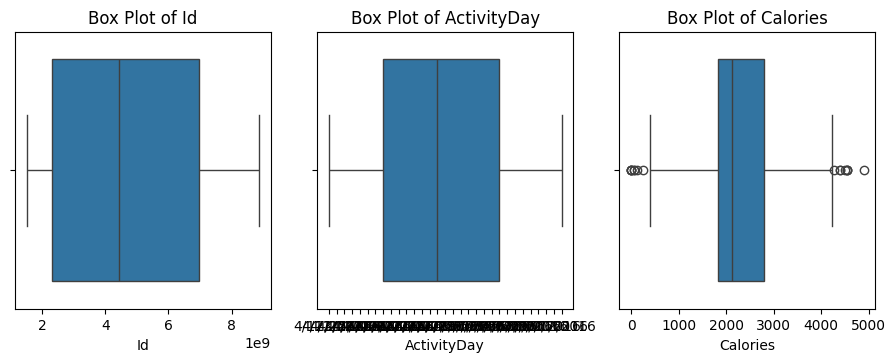

In [8]:
# Visualizing the features to identify the outliers.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, column in enumerate(dfDailyCalories.columns):
    plt.subplot(3, 5, i+1)  
    sns.boxplot(x=dfDailyCalories[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Handling the Outliers Separately on Features

1. Calories

In [9]:
# Set the lower and upper limits for Calories capping
caloriesLowerLimit = 400
caloriesUpperLimit = 4100

# Apply capping for Calories
dfDailyCalories['Calories'] = dfDailyCalories['Calories'].clip(lower=caloriesLowerLimit, upper=caloriesUpperLimit)

# Check the results
print("Capped Calories:")
print(dfDailyCalories['Calories'].describe())


Capped Calories:
count     940.000000
mean     2302.658511
std       698.692228
min       400.000000
25%      1828.500000
50%      2134.000000
75%      2793.250000
max      4100.000000
Name: Calories, dtype: float64


In [10]:
# Displaying summary statistics of all columns
print(dfDailyCalories.describe())


                 Id     Calories
count  9.400000e+02   940.000000
mean   4.855407e+09  2302.658511
std    2.424805e+09   698.692228
min    1.503960e+09   400.000000
25%    2.320127e+09  1828.500000
50%    4.445115e+09  2134.000000
75%    6.962181e+09  2793.250000
max    8.877689e+09  4100.000000


Displaying Box Plots to check that outliers are removed or not!

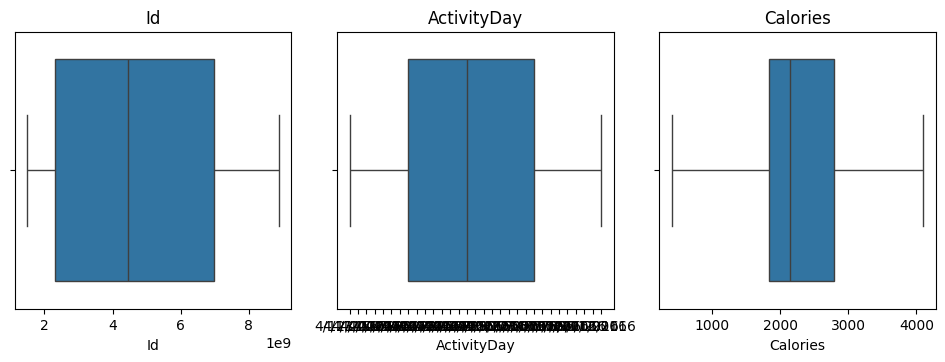

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(16, 10))

# Iterate through each column in the DataFrame
for column in dfDailyCalories.columns:
    # Create a box plot for each feature
    plt.subplot(3, 5, dfDailyCalories.columns.get_loc(column) + 1)  # Adjust the subplot grid as needed
    sns.boxplot(x=dfDailyCalories[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
# df_daily_activity is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/dailyCalories_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
dfDailyCalories.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/dailyCalories_merged_Filtered.csv
